In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import spatial, linalg, sparse, stats
from sklearn import neighbors, decomposition, manifold, preprocessing, datasets
from sklearn.metrics.pairwise import pairwise_distances

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import time

from scipy.spatial.distance import pdist, squareform

In [2]:
import scanpy as sc

In [3]:
EBT_counts = sc.read_h5ad('EBT_counts_sqrt.h5ad')
cell_type = EBT_counts.obs['cell_type']

In [4]:
from dtne import *

The code runs 62s.


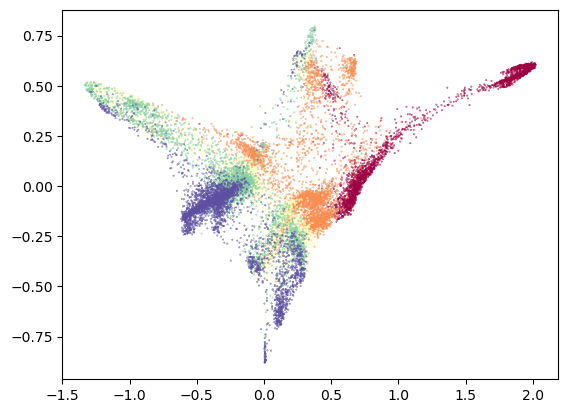

In [5]:
start_time = time.time()
embedding = DTNE(k_neighbors = 80,iter_mode='infty') 
Y = embedding.fit_transform(EBT_counts.X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_type,s=0.1,cmap='Spectral')

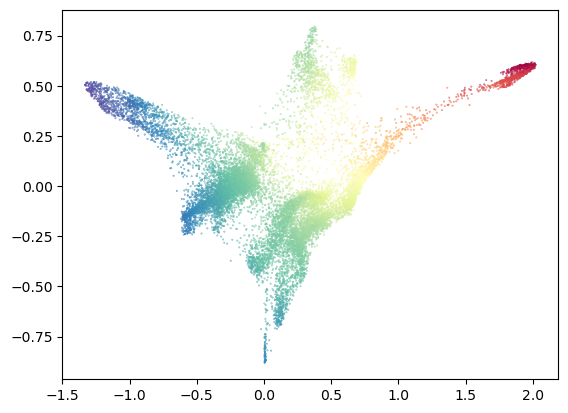

In [6]:
diff_time = embedding.order_cells(root_cells=[1257])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=0.1,cmap='Spectral')
# plt.scatter(Y[2693,0], Y[2693,1],s=1)

In [7]:
pd.DataFrame(diff_time).to_csv('eb.dtne_pseudotime.csv')

In [8]:
pd.DataFrame(Y).to_csv('eb.Y_dtne.csv')

The code runs 78s.


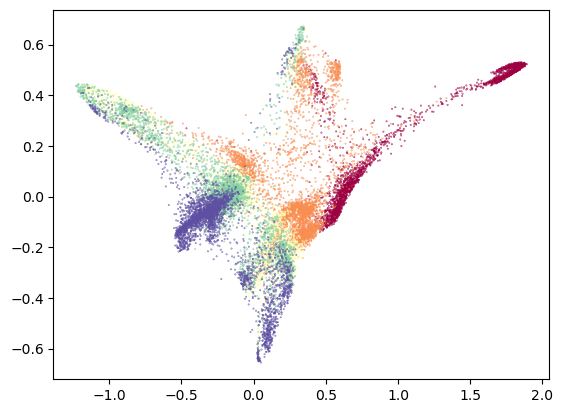

In [9]:
start_time = time.time()
embedding = DTNE(k_neighbors = 100,l1=2) 
Y = embedding.fit_transform(EBT_counts.X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_type,s=0.1,cmap='Spectral')